## SVM(Support Vector Machine)
SVM은 이진 분류를 위해 주로 사용되는 알고리즘으로, 각 클래스의 가장 외곽의 데이터들 즉, 서포트 벡터들이 가장 멀리 떨어지도록 한다.
- 딥러닝 기술 이전에 가장 인기있었던 분류 알고리즘
- 결정 경계와 서포트 벡터 사이의 거리인 마진(margin)을 가장 크게 하면서 분류를 수행하는 모델
- 최적의 결정 경계(Decision Boundary) 즉 데이터를 분류하는 기준 선을 정의하는 모델
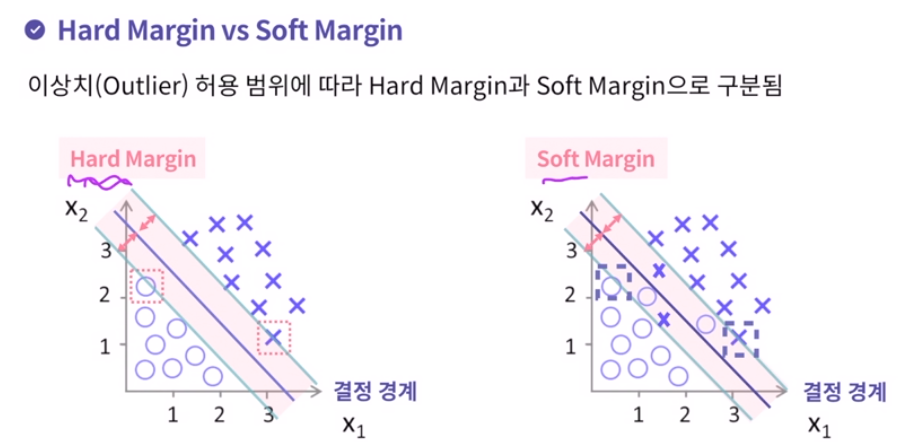
- 선형 분류와 비선형 분류 모두 가능
- 고차원 데이터에서도 높은 성능의 결과를 도출
- 회귀에서도 적용 가능
- 서포트 벡터는 결정 경계에 가장 가까운 데이터이다.
- Hard Margin 방법은 한 개의 데이터라도 오차를 허용하지 않고, Soft Margin 방법은 몇 개의 데이터에 대한 오차를 허용

SVM을 위한 사이킷런 함수/라이브러리
- from sklearn.svm import SVC : SVM 모델을 불러옵니다.
- SVC(): SVM 모델을 정의합니다.
- [Model].fit(x, y): (x, 
y) 데이터셋에 대해서 모델을 학습시킵니다.
- [Model].predict(x): x 데이터를 바탕으로 예측되는 값을 출력합니다.

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

def load_data():
    
    data = pd.read_csv("data_dataset.csv")
    
    X = data.drop('Class', axis=1)
    y = data["Class"]
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)
    print(X, y)
    return train_X, test_X, train_y, test_y
    
    
def SVM(train_X, test_X, train_y, test_y):
    svm = SVC()
    svm.fit(train_X, train_y)
    pred_y = svm.predict(test_X)
    
    return pred_y

In [4]:
train_X, test_X, train_y, test_y = load_data()

pred_y = SVM(train_X, test_X, train_y, test_y)

# SVM 분류 결과값을 출력합니다.
print("\nConfusion matrix : \n",confusion_matrix(test_y,pred_y))  
print("\nReport : \n",classification_report(test_y,pred_y)) 

      Factor01   Factor2   Factor3  Factor4
0      4.67650  -3.38950   3.48960  1.47710
1      2.67190   3.06460   0.37158  0.58619
2      0.80355   2.84730   4.34390  0.60170
3      1.44790  -4.87940   8.34280 -2.10860
4      5.24230  11.02720  -4.35300 -4.10130
...        ...       ...       ...      ...
1367   0.40614   1.34920  -1.45010 -0.55949
1368  -1.38870  -4.87730   6.47740  0.34179
1369  -3.75030 -13.45860  17.59320 -2.77710
1370  -3.56370  -8.38270  12.39300 -1.28230
1371  -2.54190  -0.65804   2.68420  1.19520

[1372 rows x 4 columns] 0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

Confusion matrix : 
 [[157   0]
 [  0 118]]

Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.0